In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
rb = pd.read_csv(r"C:\Users\ASUS\Downloads\Student_Performance.csv")

In [3]:
rb

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
rb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
rb.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [6]:
rb.corr

<bound method DataFrame.corr of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      S

In [7]:
rb.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
rb.dropna(how='any',inplace=True)
rb.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
rb.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [10]:
rb.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [11]:
rb.tail(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [12]:
rb.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
8815,4,88,Yes,7,4,73.0
2377,7,64,No,4,5,50.0
5703,6,68,No,9,7,57.0
3398,1,63,Yes,8,3,37.0
7230,7,69,No,7,1,58.0


In [13]:
rb.size

60000

In [14]:
rb.shape

(10000, 6)

In [15]:
rb.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [16]:
# split value convert to int
rb.replace({'Extracurricular Activities':{'Yes':1,'No':2}},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15388\791161780.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rb.replace({'Extracurricular Activities':{'Yes':1,'No':2}},inplace=True)


In [17]:
rb.sample(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
2131,5,56,1,7,6,46.0
540,8,45,1,6,4,41.0
188,3,91,2,5,6,72.0
7167,7,69,1,5,7,61.0
8199,1,47,2,5,5,21.0
2015,1,96,2,8,2,74.0
8798,2,90,2,9,0,70.0
3610,5,54,1,4,6,40.0
8827,2,79,1,4,8,56.0
3037,4,68,2,8,3,51.0


In [18]:
# float value convert to int

rb['Performance Index']=rb['Performance Index'].astype(int)

In [19]:
rb.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,2,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,2,8,5,66


# MODELEVELUATION

In [21]:
x = rb.drop(['Performance Index'],axis=1)
y = rb['Performance Index']

In [22]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,2,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,2,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [23]:
y

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 10000, dtype: int32

In [24]:
# splitting Traning and Test Data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
lin_reg_model = LinearRegression()

In [26]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [27]:
# pridiction of training data

trainning_data_prediction = lin_reg_model.predict(x_train)

In [28]:
# R square Errors

error_score = metrics.r2_score(y_train,trainning_data_prediction)
print('r squres error :',error_score)

r squres error : 0.9886898790682355


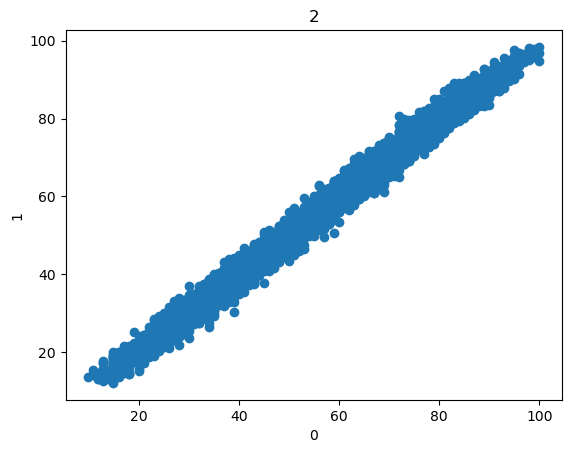

In [29]:
plt.scatter(y_train,trainning_data_prediction)
plt.xlabel('0')
plt.ylabel('1')
plt.title('2')
plt.show()

In [30]:
# Test data set prediction

test_data_prediction = lin_reg_model.predict(x_test)

In [31]:
# Test data score

error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squred error:',error_score)

R squred error: 0.9889832909573145


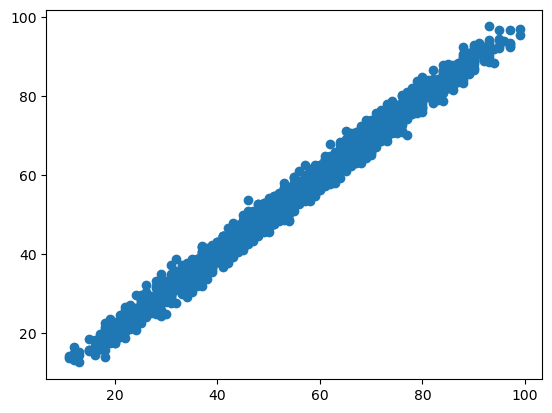

In [32]:
plt.scatter (y_test,test_data_prediction)

In [33]:
print(lin_reg_model.predict([[2,67,3,5,1]]))

[41.88915316]


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle

In [35]:
with open('student.pkl','wb') as file:
    pickle.dump(lin_reg_model, file)

In [37]:
with open('student.pkl','rb') as file:
    loaded_data = pickle.load(file)
    print(loaded_data)

LinearRegression()
